In [1]:
%pylab inline
from string import ascii_letters

import pandas as pd
import numpy as np
TodasEstaciones = "Est1_Est2_Est3.xlsx"
df = pd.read_excel(TodasEstaciones,index_col=0)
print(df.head())
#todasEstaciones.head()

Populating the interactive namespace from numpy and matplotlib
      Est1  Est2  Est3
AÑO                   
1963  18.3  15.0  20.0
1964  59.7   NaN  50.0
1965  29.2   NaN  15.0
1966  78.0   NaN  34.0
1967  84.9   NaN  45.0


(array([1960., 1965., 1970., 1975., 1980., 1985., 1990., 1995.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

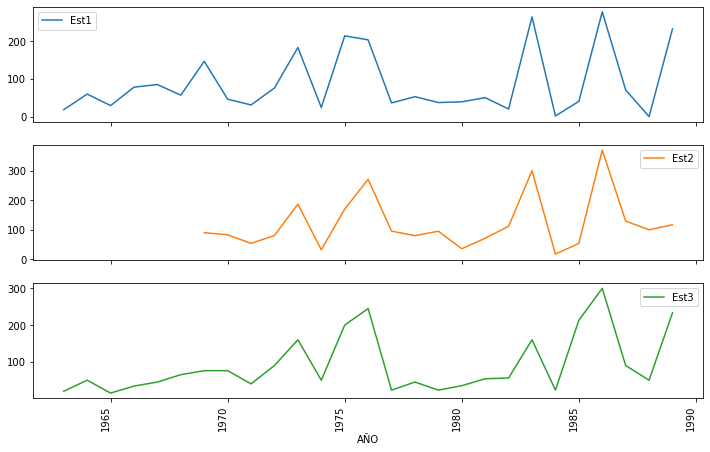

In [2]:
df.plot(subplots=['Est1','Est2','Est3'], figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

In [3]:
import seaborn as sns
#x_train = TodasEstaciones.loc['1963':'1989',['Est1','Est3']].astype(float32).values
#y_train = TodasEstaciones.loc['1963':'1989',['Est2']].astype(float32).values
x_train = df.loc['1963':'1989',['Est1','Est3']].astype(float32).values
y_train = df.loc['1963':'1989',['Est2']].astype(float32).values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(x_train)
x_train= scaler.transform(x_train)

In [5]:
x_train[:20]

array([[-0.8484759 , -0.8998731 ],
       [-0.34375212, -0.52246034],
       [-0.71558964, -0.96277523],
       [-0.12064964, -0.72374713],
       [-0.03652901, -0.58536243],
       [-0.37788802, -0.333754  ],
       [ 0.71568   , -0.19536933],
       [-0.50833595, -0.19536933],
       [-0.6960834 , -0.6482646 ],
       [-0.14747067, -0.01924339],
       [ 1.1606659 ,  0.86138624],
       [-0.77776575, -0.52246034],
       [ 1.5361607 ,  1.3646032 ],
       [ 1.408151  ,  1.9307222 ],
       [-0.6302499 , -0.86213183],
       [-0.42787278, -0.58536243],
       [-0.6180585 , -0.86213183],
       [-0.5948949 , -0.7111667 ],
       [-0.45957038, -0.47213864],
       [-0.82775044, -0.4469778 ]], dtype=float32)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(14, activation='linear', input_shape=(2,)))
model.add(Dense(12, activation='linear'))
model.add(Dense(8, activation='linear'))
model.add(Dense(3, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                42        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt = keras.optimizer,Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error' ,optimizer=opt metrics=['accuracy'])
model.fit(x_train, y_train,epochs=200,verbose=0)

In [10]:
y_pred =model.predict(x_train)
y_pred[:20]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

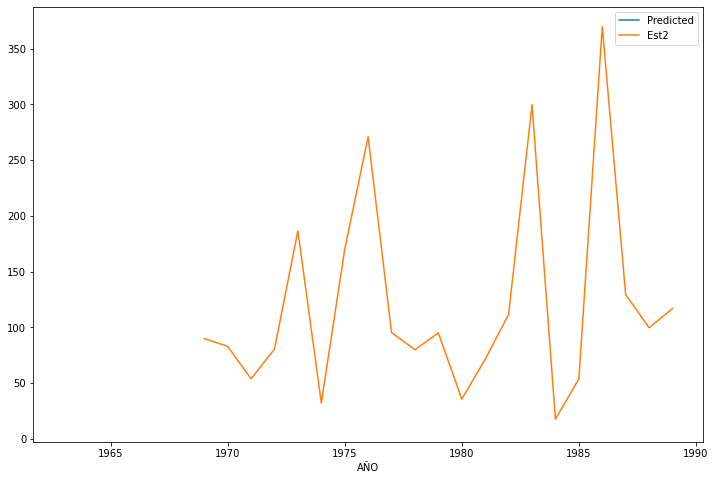

In [11]:
plot(df.loc['1963':'1989'].index,y_pred,label='Predicted')
df['Est2'].loc['1963':'1989'].plot()
figsize(12,8)
legend(loc='best')
     

In [12]:
x_missing = df.loc['1963':'1989',['Est1','Est3']].astype(float32).values

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(x_missing)
x_missing= scaler.transform(x_missing)


In [15]:
y_missing= model.predict(x_missing)
y_missing= y_missing.reshape([27]).tolist()

In [19]:
df['Est2_Completed']=df['Est2']
df['Est2_Completed'].loc['1963':'1989']=y_missing

(array([1960., 1965., 1970., 1975., 1980., 1985., 1990., 1995.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

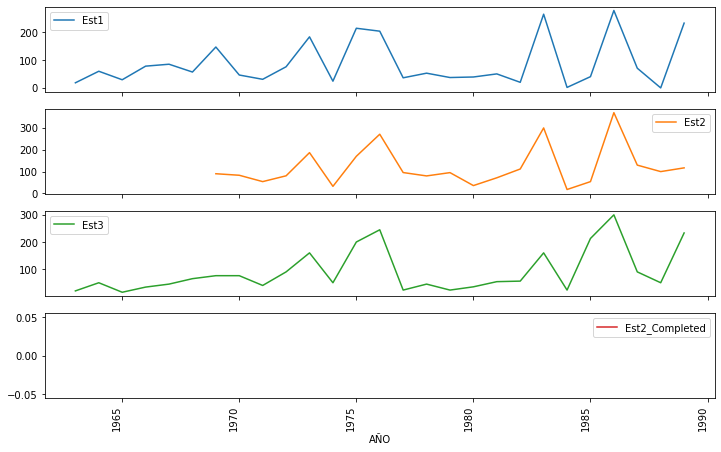

In [20]:
df.plot(subplots=['Est1','Est2','Est2_Completed','Est3'], figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')